In [1]:
%matplotlib inline
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
sys.version_info

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)

In [4]:
from MomentMatching.newMomentMatch import UnscentedTransform, TaylorTransform, MonteCarloTransform
from Systems import UniformNonlinearGrowthModel
from MomentMatching.StateModels import GaussianState
from ExpectationPropagation import EPNodes
from MomentMatching.ExpectationPropagation import TopEP
from Filters.KalmanFilter import KalmanFilterSmoother, PowerKalmanFilterSmoother
from Utils.Metrics import nll, rmse
from Utils.Plot_Helper import plot_gaussian, plot_gaussian_node
from Systems import BearingsOnlyTracking
import logging

In [65]:
SEED = 11

np.random.seed(seed=SEED)

N = 50
system = UniformNonlinearGrowthModel()
# system = BearingsOnlyTracking()
data = system.simulate(N)
x_true, x_noisy, y_true, y_noisy = zip(*data)


power = 1
damping = 1

transform = UnscentedTransform(n=1,  beta=0,  alpha=1, kappa=2)
meas_transform = UnscentedTransform(n=1, beta=0,  alpha=1, kappa=2)

In [107]:
def _power_sweep(power, damping):
    transform = UnscentedTransform(n=1, beta=0, alpha=1, kappa=3)
    meas_transform = UnscentedTransform(n=1, beta=0, alpha=1, kappa=2)
#     transform = TaylorTransform()
#     transform = MonteCarloTransform(number_of_samples=2000)
#     meas_transform = MonteCarloTransform(number_of_samples=2000)
    Nodes = EPNodes(dimension_of_state=1, N=N)
    EP = TopEP(system_model=system,
               moment_matching=transform,
               meas_transform=meas_transform,
               power=power,
               damping=damping)

    EPNodesList = EP.forward_backward_iteration(10, Nodes, y_noisy, list(range(0, N)), x_true)

    Node = [node.marginal for node in EPNodesList[-1]]
    return nll(Node, x_true), rmse(Node, x_true)

In [108]:
x = 20
y = 20
power_range = np.linspace(0.1, 1.0, num=x)
damp_range = np.linspace(0.1, 1.0, num=y)

In [109]:
results = []
NLL = []
RMSE = []
for power, damping in itertools.product(power_range, damp_range):
    print('Power = {0:.4f} and Damping = {1:.4f}'.format(power, damping))
    ans = _power_sweep(power, damping)
    a1, a2 = ans
    NLL.append(a1)
    RMSE.append(a2)
    results.append(ans)

Power = 0.1000 and Damping = 0.1000
Power = 0.1000 and Damping = 0.1474
Power = 0.1000 and Damping = 0.1947
Power = 0.1000 and Damping = 0.2421
Power = 0.1000 and Damping = 0.2895
Power = 0.1000 and Damping = 0.3368
Power = 0.1000 and Damping = 0.3842
Power = 0.1000 and Damping = 0.4316
Power = 0.1000 and Damping = 0.4789
Power = 0.1000 and Damping = 0.5263
Power = 0.1000 and Damping = 0.5737
Power = 0.1000 and Damping = 0.6211
Power = 0.1000 and Damping = 0.6684
Power = 0.1000 and Damping = 0.7158
Power = 0.1000 and Damping = 0.7632
Power = 0.1000 and Damping = 0.8105
Power = 0.1000 and Damping = 0.8579
Power = 0.1000 and Damping = 0.9053
Power = 0.1000 and Damping = 0.9526
Power = 0.1000 and Damping = 1.0000
Power = 0.1474 and Damping = 0.1000
Power = 0.1474 and Damping = 0.1474
Power = 0.1474 and Damping = 0.1947
Power = 0.1474 and Damping = 0.2421
Power = 0.1474 and Damping = 0.2895
Power = 0.1474 and Damping = 0.3368
Power = 0.1474 and Damping = 0.3842
Power = 0.1474 and Damping =

LinAlgError: 

In [73]:
results

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
<class 'tuple'>: (array([ 19.3843]), array([ 13.7534]), array([ 1.885]), array([ 4.9506]), array([ 7.9152]))

In [ ]:
<class 'tuple'>: (array([ 19.3843]), array([ 13.7534]), array([ 1.885]), array([ 4.9506]), array([ 7.9152]))

In [81]:
for power, damping in itertools.product(power_range, damp_range):
    print('Power = {0:.4f} and Damping = {1:.4f}'.format(power, damping))

Power = 0.1000 and Damping = 0.1000
Power = 0.1000 and Damping = 1.0000
Power = 0.3250 and Damping = 0.1000
Power = 0.3250 and Damping = 1.0000
Power = 0.5500 and Damping = 0.1000
Power = 0.5500 and Damping = 1.0000
Power = 0.7750 and Damping = 0.1000
Power = 0.7750 and Damping = 1.0000
Power = 1.0000 and Damping = 0.1000
Power = 1.0000 and Damping = 1.0000


In [86]:
len(results)

100

In [41]:
ll = np.array(NLL)
Rmse = np.array(RMSE)

In [42]:
ind_ll = np.array(list(itertools.product(power_range, damp_range)))

In [43]:
ind_ll.reshape(x, y, 2)[0]

array([[ 0.1,  0.1],
       [ 0.1,  0.2],
       [ 0.1,  0.3],
       [ 0.1,  0.4],
       [ 0.1,  0.5],
       [ 0.1,  0.6],
       [ 0.1,  0.7],
       [ 0.1,  0.8],
       [ 0.1,  0.9],
       [ 0.1,  1. ]])

In [87]:

img_ll = ll.reshape(x, y)
img_rmse = Rmse.reshape(x, y)

In [88]:
np.argmin(img_ll)

59

In [89]:
ind_ll[np.argmin(img_ll)]

array([ 0.6,  1. ])

In [90]:
ind_ll[np.argmax(img_ll)]

array([ 0.2,  1. ])

In [91]:
ind_ll[3]

array([ 0.1,  0.4])

In [92]:
NLL[3]

5.4990622698893956

In [93]:
_power_sweep(0.1, 0.4)

(5.2300851128571324, 11.739774798667106)

In [94]:
img_rmse[6][4]

IndexError: index 6 is out of bounds for axis 0 with size 5

In [95]:
np.max(img_rmse)

57506.127785512697

In [96]:
methods = [None, 'none','nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

In [97]:
len(methods)

18

In [98]:
# fig, ax = plt.subplots(4,4)

In [99]:
ax[0]

TypeError: 'AxesSubplot' object does not support indexing

In [100]:
def plot(img, methods):
    plt.imshow(img_ll, interpolation=methods[9], extent=[0.1,1,0.1,1], cmap='jet', clim=(0, 6))
    ax = plt.gca()
    ax.set_xlabel('Power')
    ax.set_ylabel('Damping')
    ax.grid(False)
    plt.colorbar()

In [101]:
log_nll = np.log(img_ll)

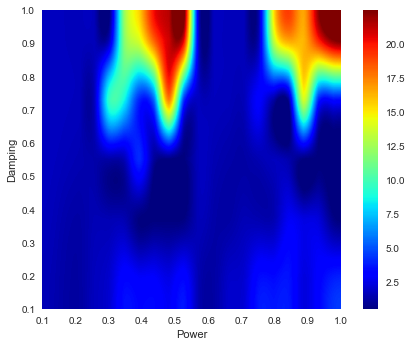

In [102]:
plt.imshow(log_nll, interpolation=methods[5], extent=[0.1,1,0.1,1], cmap='jet', vmax=np.max(log_nll), vmin=np.min(log_nll))
ax = plt.gca()
ax.set_xlabel('Power')
ax.set_ylabel('Damping')
ax.grid(False)
plt.colorbar()

In [103]:
log_rmse = np.log(img_rmse)

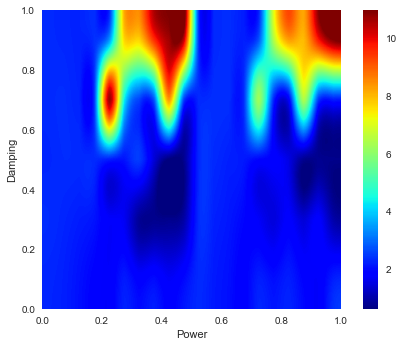

In [104]:
plt.imshow(log_rmse, interpolation=methods[5], extent=[0.0,1,0.0,1], cmap='jet', vmax=np.max(log_rmse), vmin=np.min(log_rmse))
ax = plt.gca()
ax.set_xlabel('Power')
ax.set_ylabel('Damping')
ax.grid(False)
plt.colorbar()

In [ ]:
dx

In [ ]:
x_plot, y_plot = np.mgrid[0.1:1.1:0.1, 0.1:1.1:0.1]

In [ ]:
plt.pcolor( y_plot, x_plot, log_rmse, cmap='RdBu' )
plt.colorbar()
# plt.axis([x_plot.min(), x_plot.max(), y_plot.min(), y_plot.max()])

In [ ]:
for i in range(len(power_range)):
    plt.plot(power_range, img_ll[:, i])

In [ ]:
Rmse